In [1]:
import numpy as np
import pandas as pd
import thinfilm as tm
import material as ml
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution as de

In [2]:
# open measurement file
scan_file = pd.read_csv('./measurement/R_5_B6.csv')
scan = scan_file['SCAN'].values

In [3]:
# open material
SiO2 = ml.open_material('SiO2', 'Sellmeier')
SiN = ml.open_material('SiN', 'Sellmeier')
ITO = ml.open_material('ITO', 'Sellmeier')
Acrylic = ml.open_material('Acrylic', 'Sellmeier')
OC = ml.open_material('OC', 'Sellmeier')
sodalime = ml.open_material('sodalime', 'Material')
SiO2.k = 1e-3
ITO.k = 1e-1
SiN.k = 1e-1
air = ml.Non_Dispersion(1)

In [4]:
SiO2_t = ml.Non_Dispersion(1.48)
SiN_t = ml.Non_Dispersion(2.1)
ITO_t = ml.Non_Dispersion(1.9)

In [21]:
x = 230
target_w = np.linspace(400, 700, 301)[x:x+11]
target_R = (scan[x:x+11] - 0.11)/100
print(target_w)

[630. 631. 632. 633. 634. 635. 636. 637. 638. 639. 640.]


In [22]:
def fom(th):
    SiO2_t.n = th[6]
    SiO2_t.k = th[7] 
    SiN_t.n = th[8] 
    SiN_t.k = th[9] 
    ITO_t.n = th[10] 
    ITO_t.k = th[11]
    hypo_R = tm.Design([air, Acrylic, SiN_t, SiO2_t, ITO_t, SiO2_t, SiN_t, sodalime],
                       [None, th[0], th[1], th[2], th[3], th[4], th[5], None]
                      ).reflectance(target_w, 5)
    return sum((target_R - hypo_R)**2)

In [23]:
tht = [(1600,2000),(8,12),(40,60),(20,26),(40,60),(8,12),
       (1.4,1.52),(0,1),(1.9, 3),(0,1),(1.7,1.9),(0,1)]
sol = de(fom, tht)

In [24]:
print(sol.message)
print(sol.x)

Maximum number of iterations has been exceeded.
[1.64109612e+03 8.49891838e+00 5.22152751e+01 2.02448712e+01
 5.38055888e+01 1.03516225e+01 1.40722540e+00 8.96612398e-04
 2.16889968e+00 5.22132490e-01 1.81794689e+00 2.56873327e-01]


In [25]:
pd.DataFrame({635:sol.x}).to_csv('./c_f/635.csv')

In [10]:
def hyp(th):
    SiO2_t.n = th[6]
    SiO2_t.k = th[7] 
    SiN_t.n = th[8] 
    SiN_t.k = th[9] 
    ITO_t.n = th[10] 
    ITO_t.k = th[11]
    hypo_R = tm.Design([air, Acrylic, SiN_t, SiO2_t, ITO_t, SiO2_t, SiN_t, sodalime],
                       [None, th[0], th[1], th[2], th[3], th[4], th[5], None]
                      ).reflectance(target_w, 5)
    return hypo_R

In [13]:
hypo_R = lambda th: tm.Design([air, Acrylic, SiN, SiO2, ITO, SiO2, SiN, sodalime],
                              [None, th[0], th[1], th[2], th[3], th[4], th[5], None]
                             ).reflectance(target_w, 5)
FOM = lambda th: sum((hypo_R(th)-target_R)**2)

In [14]:
th = [(1500, 2500),(4, 20),(20, 80),(10,30),(20, 80),(4,20)]
res = de(FOM, th)

In [15]:
print(res.message)
print(res.x)

Optimization terminated successfully.
[1761.61872795   17.5172188    26.65292249   29.99451415   22.47133706
   12.82781435]


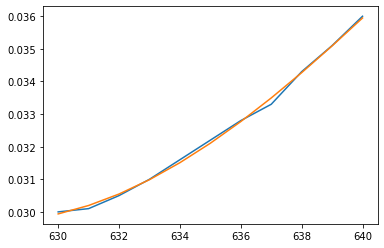

In [26]:
plt.plot(target_w, target_R)
#plt.plot(target_w, hypo_R(res.x))
plt.plot(target_w, hyp(sol.x))
#plt.savefig('highn.png')
plt.show()